<a href="https://colab.research.google.com/github/Kingslayersach/Capstone_Project-1/blob/main/Capstone_Project_1_(Playstore_App_Analysis_and_User_Review_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##     <b>EDA on Play Store apps and User Reviews

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
import pandas as pd
import numpy as np
# seaborn is a library used for EDA
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#mounting the drive to colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing the dataset
playstore_df  = pd.read_csv('/content/drive/MyDrive/Datasets/Play_Store_Data.csv')

In [ ]:
# head() is used to see the first five rows of the dataset
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# tail() is used to see the last five rows of the dataset
playstore_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# it will show thw number of rows and columns present in the dataset
playstore_df.shape

(10841, 13)

In [ ]:
# to know all the details regarding count, mean , median, mode etc.
playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<b>Remove Duplicates

In [ ]:
# it will remove the duplicate rows from the dataset
playstore_df.drop_duplicates(subset='App', keep='last', inplace=True)

In [ ]:
# it will show thw number of rows and columns present in the dataset after removal of duplicates
playstore_df.shape

(9660, 13)

In [ ]:
playstore_df.describe()

,Rating
count,8197.000000
mean,4.175027
std,0.560685
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5e6d63550>]],
      dtype=object)

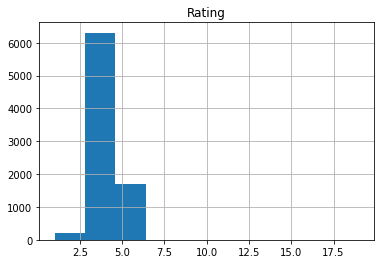

In [ ]:
# this command is for plotting a histogram
playstore_df.hist()

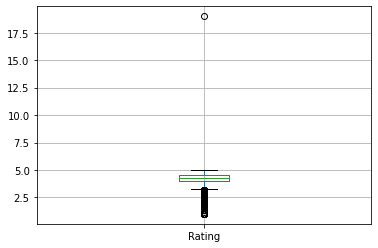

In [ ]:
# it is the diagramatic representation of the outlier 
playstore_df.boxplot()

### <b> Data Cleaning

In [ ]:
# show all the details of columns in the dataset
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [ ]:
# isnull() is used of how many rows and coulmns in our data is null value.
playstore_df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# we find the sum of the outliers present in the particular column
playstore_df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# This is for the outliers of data
playstore_df[playstore_df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
# Now we will drop this row from the dataset
playstore_df.drop([10472],inplace=True)

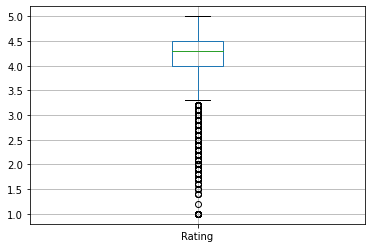

In [ ]:
# This is the boxplot after the removal of outlier 
playstore_df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5e6bd7610>]],
      dtype=object)

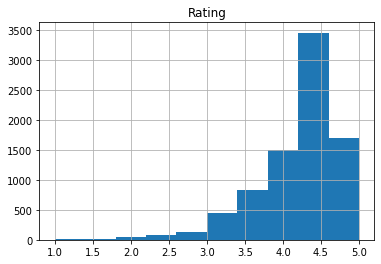

In [ ]:
# Representation of the data in the dataset using histogram
playstore_df.hist()

<b> Removing the columns that are 90% empty

In [ ]:
threshold = len(playstore_df)*0.1 # we are taking 10 % (of my rows = 10840)
threshold

965.9000000000001

In [ ]:
# dropping the rows which are 90% empty
playstore_df.dropna(thresh=threshold, axis=1, inplace=True)

In [ ]:
playstore_df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
# after removal of 90% empty columns
playstore_df.shape

(9659, 13)

### <b> Data Imputation and Manipulation:

Fill the null values with appropriate values using aggregate functions such as mean,median or mode

In [ ]:
# Define a impute median function
def impute_median(series):
  # fill those values which are empty with median as the histogram is right skewed
  return series.fillna(series.median())

In [ ]:
playstore_df.Rating = playstore_df['Rating'].transform(impute_median)

In [ ]:
# count the number of null values in each column
playstore_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [ ]:
# modes of categorical values: Categorical values are those which can be divided into categories
print(playstore_df['Type'].mode())
print(playstore_df['Current Ver'].mode())
print(playstore_df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [ ]:
# filling the missing categorical values with mode values
playstore_df['Type'].fillna(str(playstore_df['Type'].mode().values[0]), inplace=True)
playstore_df['Current Ver'].fillna(str(playstore_df['Current Ver'].mode().values[0]), inplace=True)
playstore_df['Android Ver'].fillna(str(playstore_df['Android Ver'].mode().values[0]), inplace=True)

In [ ]:
#count the number of null values in each column
playstore_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
# Let's convert Price, Reviews and Ratings into Numerical Values
playstore_df['Price'] = playstore_df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
playstore_df['Price'] = playstore_df['Price'].apply(lambda x: float(x))
playstore_df['Reviews'] = pd.to_numeric(playstore_df['Reviews'], errors='coerce')

In [ ]:
playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x: float(x))

In [ ]:
playstore_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880,28M,1000000.0,Free,0.0,Everyone,Art & Design,"October 27, 2017",1.0.4,4.1 and up


In [ ]:
playstore_df.describe()

,Rating,Reviews,Installs,Price
count,9659.000000,9.659000e+03,9.659000e+03,9659.000000
mean,4.192422,2.166512e+05,7.794247e+06,1.097231
std,0.496071,1.830738e+06,5.376991e+07,16.851618
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,1.000000e+06,0.000000
max,5.000000,7.812821e+07,1.000000e+09,400.000000


In [ ]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


<b> Counting the number of Free and Paid applications

In [ ]:
#Counting the free apps
free_apps = playstore_df['Type'] == 'Free'
free_apps = free_apps.sum()
print("Free apps:",free_apps)

#Counting the paid apps 
paid_apps = playstore_df['Type'] == 'Paid'
paid_apps = paid_apps.sum()
print("Paid apps:",paid_apps)


Free apps: 8905
Paid apps: 754


## <b>Visualizing Free and paid apps

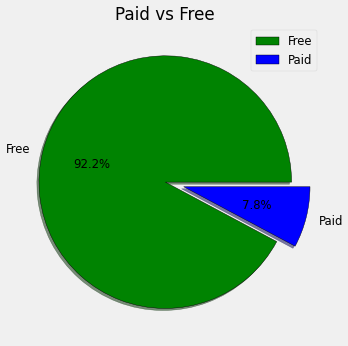

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (6,6),dpi = 60)
slices = [free_apps,paid_apps]
labels = ['Free','Paid']  
explode = [0, 0.15]

plt.pie(slices, labels=labels, explode=explode, shadow=True, colors=['#008301','blue'],
        startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
plt.legend( labels, loc="best")

#plt.pie(slices)
plt.title("Paid vs Free")
plt.tight_layout()
plt.show()

<b>From the above pie char we can consider that the maximum number of

In [ ]:
playstore_df.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880,28M,1000000.0,Free,0.0,Everyone,Art & Design,"October 27, 2017",1.0.4,4.1 and up


In [ ]:
playstore_df.describe()

,Rating,Reviews,Installs,Price
count,9659.000000,9.659000e+03,9.659000e+03,9659.000000
mean,4.192422,2.166512e+05,7.794247e+06,1.097231
std,0.496071,1.830738e+06,5.376991e+07,16.851618
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,1.000000e+06,0.000000
max,5.000000,7.812821e+07,1.000000e+09,400.000000


## <b>Data Visualisation among categories 

In [ ]:
grp = playstore_df.groupby('Category')
a = grp['Rating'].agg(np.mean)
b = grp['Price'].agg(np.sum)
c = grp['Installs'].agg(np.mean)

print(a)
print(b)
print(c)

Category
ART_AND_DESIGN         4.357377
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.334234
BUSINESS               4.172792
COMICS                 4.185714
COMMUNICATION          4.154747
DATING                 4.050000
EDUCATION              4.350980
ENTERTAINMENT          4.111392
EVENTS                 4.395313
FAMILY                 4.200367
FINANCE                4.138551
FOOD_AND_DRINK         4.191964
GAME                   4.243305
HEALTH_AND_FITNESS     4.250871
HOUSE_AND_HOME         4.167123
LIBRARIES_AND_DEMO     4.207143
LIFESTYLE              4.131436
MAPS_AND_NAVIGATION    4.062595
MEDICAL                4.204040
NEWS_AND_MAGAZINES     4.156693
PARENTING              4.300000
PERSONALIZATION        4.325532
PHOTOGRAPHY            4.165125
PRODUCTIVITY           4.206150
SHOPPING               4.238119
SOCIAL                 4.255230
SPORTS                 4.234862
TOOLS                  4.074427
TRAVEL_AND_LOCAL       4.103196

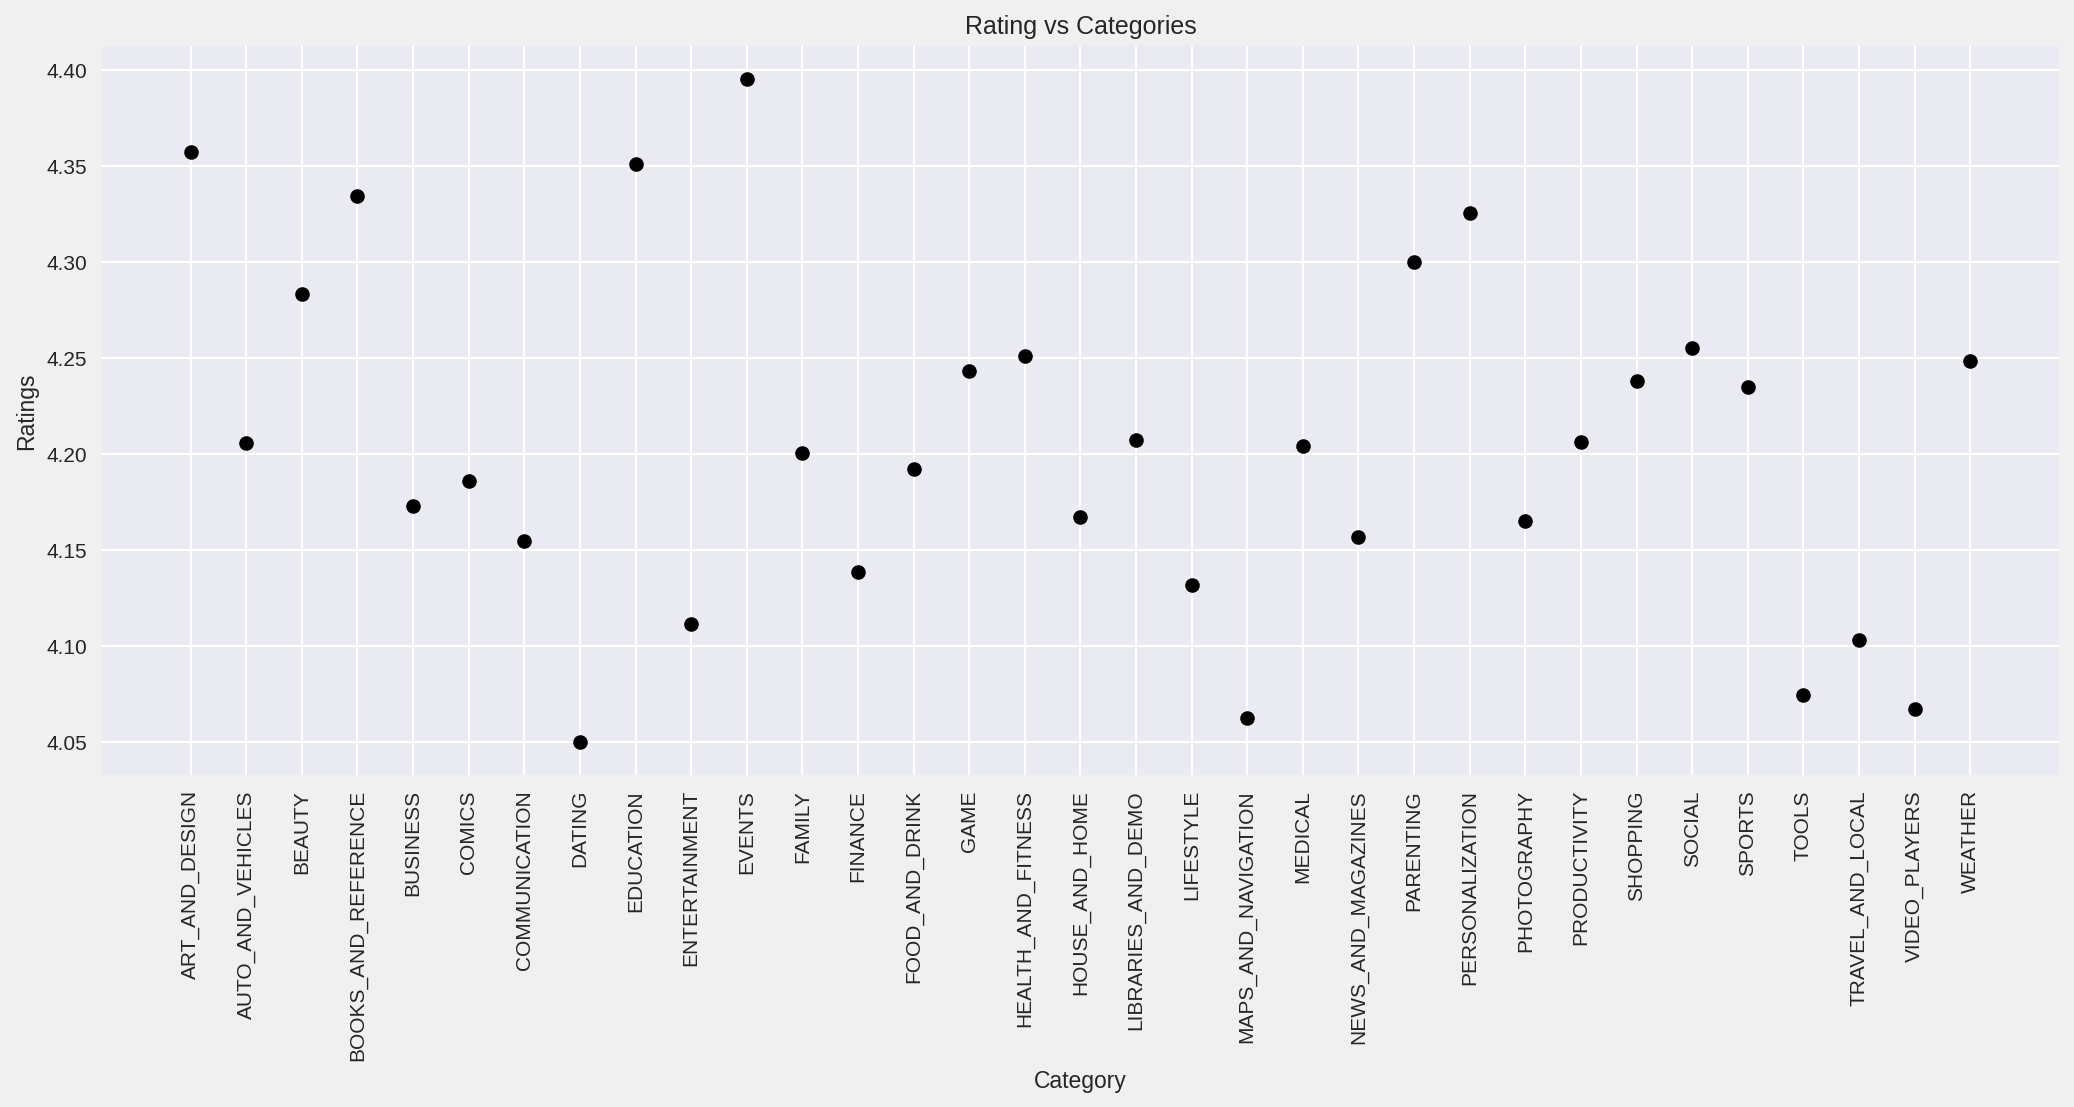

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize = (15,6),dpi = 150)
plt.style.use('seaborn')
plt.plot(a,'ro', color='black')
plt.xticks(rotation = 90)
plt.title('Rating vs Categories')
plt.xlabel('Category')
plt.ylabel('Ratings')
plt.show()

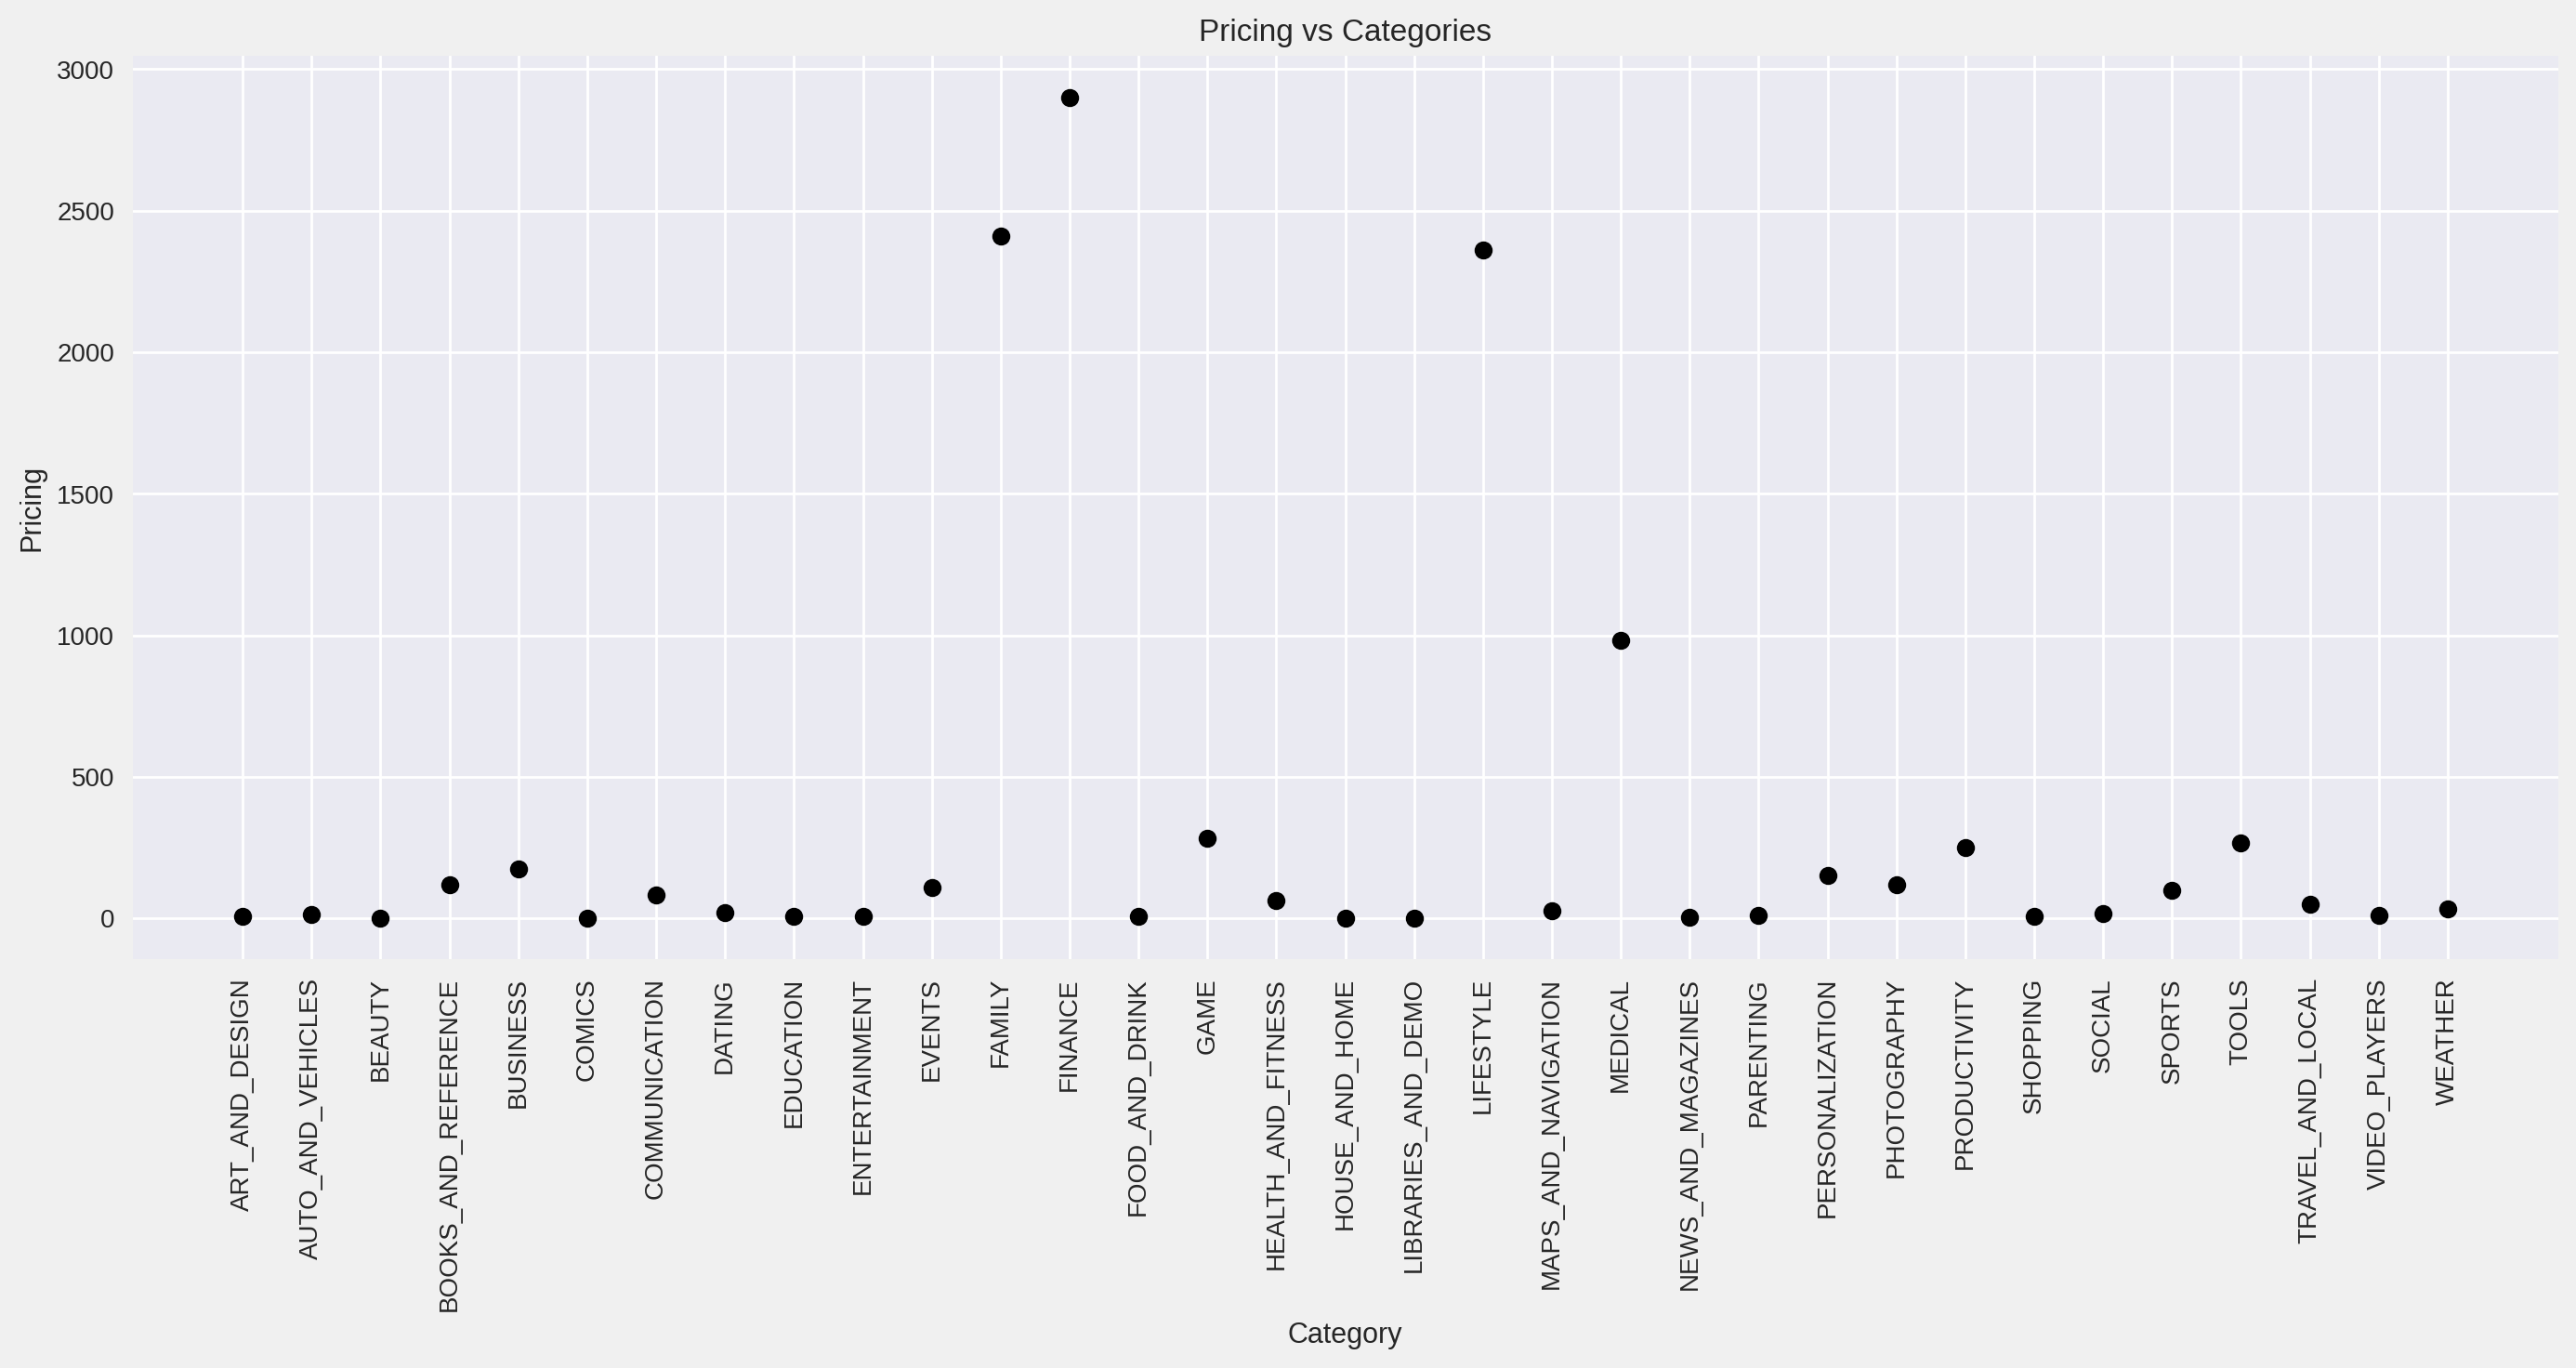

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize = (15,6),dpi = 200)
plt.style.use('seaborn')
plt.plot(b,'ro', color='black')
plt.xticks(rotation = 90)
plt.title('Pricing vs Categories')
plt.xlabel('Category')
plt.ylabel('Pricing')
plt.show()

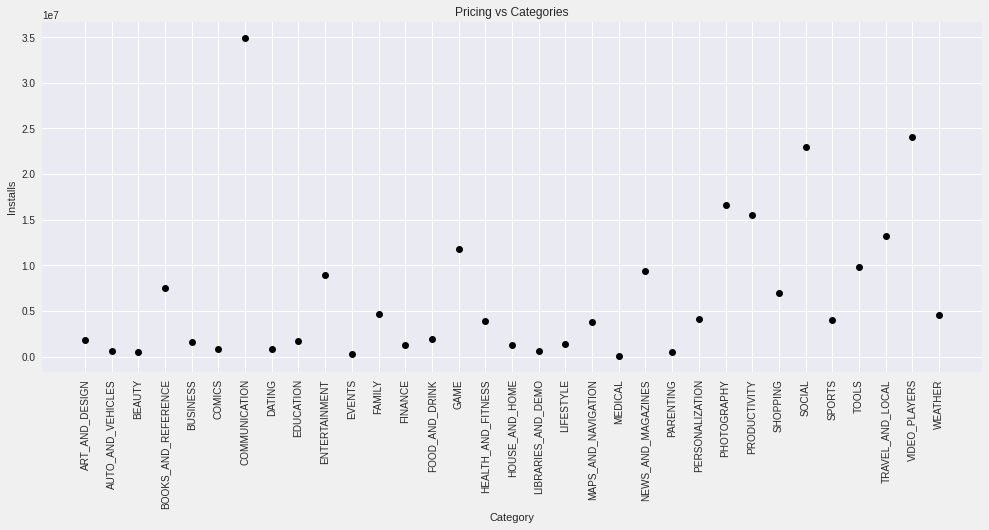

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize = (15,6))
plt.style.use('seaborn')
plt.plot(c,'ro', color='black')
plt.xticks(rotation = 90)
plt.title('Pricing vs Categories')
plt.xlabel('Category')
plt.ylabel('Installs')
plt.show()

In [ ]:
playstore_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
new_col = playstore_df[['Price','Rating','Installs','Reviews']]

In [ ]:
new_col.head()

,Price,Rating,Installs,Reviews
0,0.0,4.1,10000.0,159
2,0.0,4.7,5000000.0,87510
3,0.0,4.5,50000000.0,215644
4,0.0,4.3,100000.0,967
5,0.0,4.4,50000.0,167


## <b> Plotting the heat map for correlation matrix

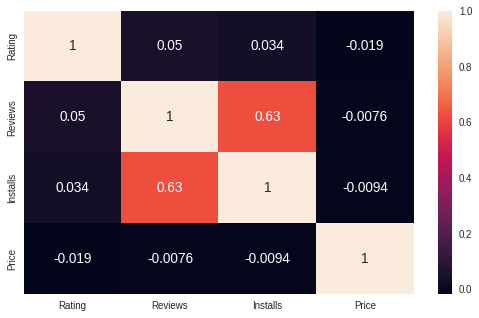

In [ ]:
plt.figure(figsize=(8,5),dpi = 70)
corrMatrix = playstore_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

From the above heatmap we can consider few things -
- Rating has less negative correlation with Price 
- Reviews has less negative correlation with Price
- Number of installations show little negaitive correlation with Price

- Reviews and the number of installations are highly correlated
- Reviews and Ratings are very less positive correlated 
- Number of installations and Price are little positive correlated 

In [ ]:
new_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     9659 non-null   float64
 1   Rating    9659 non-null   float64
 2   Installs  9659 non-null   float64
 3   Reviews   9659 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 377.3 KB


# <b> Getting Insights about apps

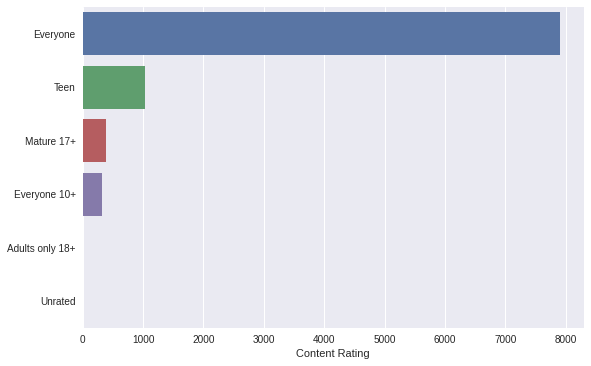

In [ ]:
df7 = playstore_df['Content Rating'].value_counts()
df7 = df7.sort_values(ascending = False)
sns.barplot(y=df7.index,x=df7)

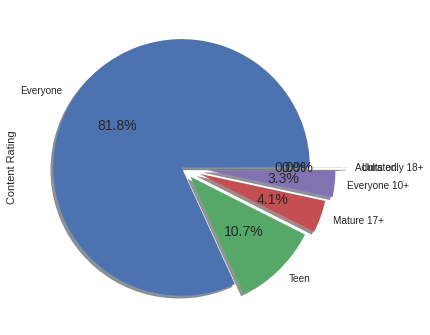

In [ ]:
df7.plot.pie(explode=[0,0.1,0.15,0.20,0.25,0.30],shadow = True, autopct="%1.1f%%")

<Figure size 2400x2400 with 0 Axes>

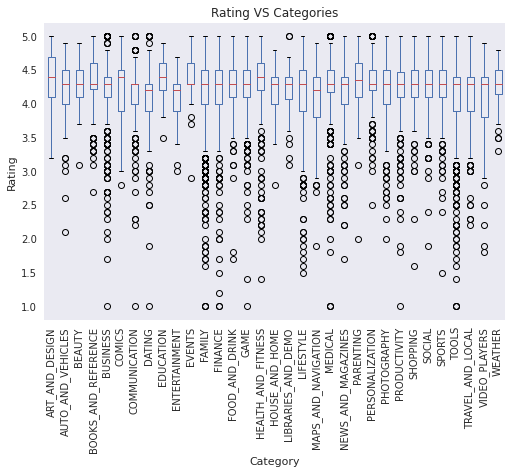

In [ ]:
plt.figure(figsize=(12,12), dpi=200)
ax1 = playstore_df.boxplot(by ='Category', column = ['Rating'], grid = False)
ax1.set_ylabel("Rating")
sns.set_style("whitegrid")
plt.xticks(rotation=90)
plt.suptitle("")
plt.title('Rating VS Categories')
plt.show()

###  Top 5 applications based on the Rating

In [ ]:
playstore_df[['App','Category','Rating','Installs']].sort_values(by = ['Rating'], ascending = False).head(5)

,App,Category,Rating,Installs
7405,Nur təfsiri 1-ci cild,LIBRARIES_AND_DEMO,5.0,1000.0
7321,CG Jobs,FAMILY,5.0,10.0
9427,ei Calc,TOOLS,5.0,10.0
5776,Food-Aw - Order Food Online in Aruba,FOOD_AND_DRINK,5.0,100.0
7320,CG - Chemistry free,FAMILY,5.0,1000.0


###  Top 5 apps based on the Reviews

In [ ]:
playstore_df[['App','Category','Reviews','Installs']].sort_values(by=['Reviews'], ascending = False).head(5)

,App,Category,Reviews,Installs
3943,Facebook,SOCIAL,78128208,1.000000e+09
3904,WhatsApp Messenger,COMMUNICATION,69109672,1.000000e+09
3909,Instagram,SOCIAL,66509917,1.000000e+09
4104,Messenger – Text and Video Chat for Free,COMMUNICATION,56642847,1.000000e+09
3986,Clash of Clans,FAMILY,44881447,1.000000e+08


### <b> Number of Installations in a particular categories

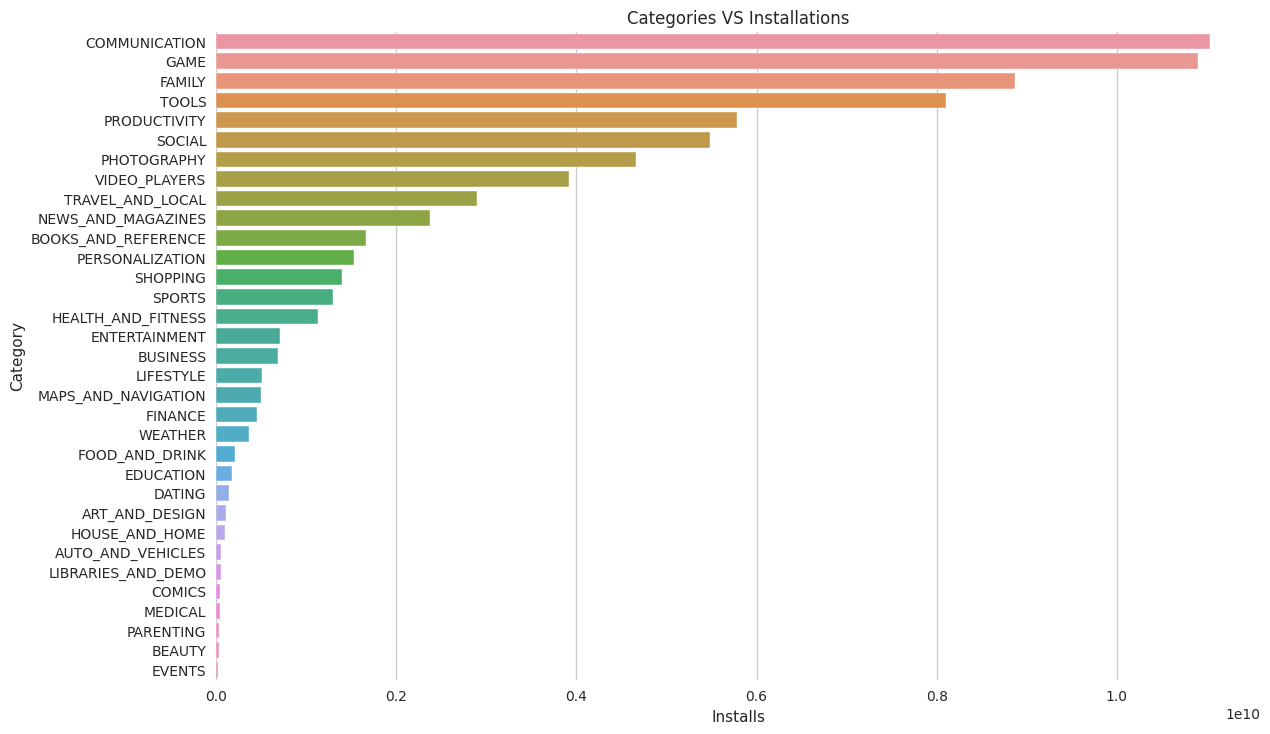

In [ ]:
plt.figure(figsize = (12,8), dpi = 100)
df = playstore_df.groupby(['Category']).sum()['Installs']
df = df.sort_values(ascending = False)
sns.barplot(y=df.index,x=df)
##plt.xticks(rotation=90)
plt.title('Categories VS Installations')
plt.show()

### <b> Adding Revenue Column to the dataset

In [ ]:
playstore_df['Revenue'] = playstore_df['Price']*playstore_df['Installs']

### <b> Sorting and Displaying the Top 5 Revenue Generating applications

In [ ]:
df1 = playstore_df[['App','Revenue']].sort_values(by=['Revenue'], ascending = False).head(9)
df1

,App,Revenue
4347,Minecraft,69900000.0
5351,I am rich,39999000.0
5356,I Am Rich Premium,19999500.0
4034,Hitman Sniper,9900000.0
7417,Grand Theft Auto: San Andreas,6990000.0
5578,Sleep as Android Unlock,5990000.0
2950,Facetune - For Free,5990000.0
8804,DraStic DS Emulator,4990000.0
4367,I'm Rich - Trump Edition,4000000.0


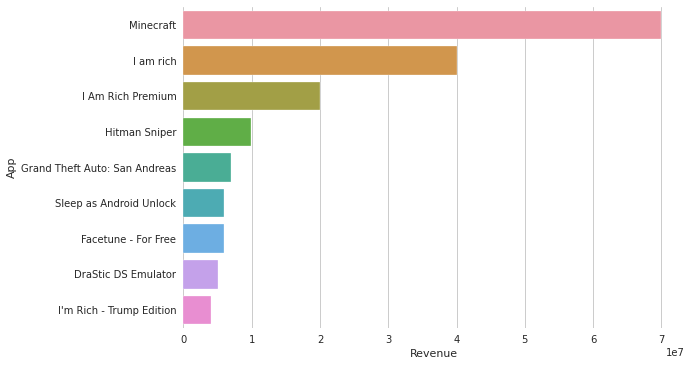

In [ ]:
sns.barplot(x=df1['Revenue'], y=df1['App'])
#plt.yticks(rotation=90)
plt.show()

### <b> Sorting the Category of Applications with respect to the revenue generated by them

In [ ]:
df2 = playstore_df[['Category','Revenue']].sort_values(by=['Revenue'], ascending = False).head(20)
df2

,Category,Revenue
4347,FAMILY,69900000.0
5351,LIFESTYLE,39999000.0
5356,FINANCE,19999500.0
4034,GAME,9900000.0
7417,GAME,6990000.0
5578,LIFESTYLE,5990000.0
2950,PHOTOGRAPHY,5990000.0
8804,GAME,4990000.0
4367,LIFESTYLE,4000000.0
4362,LIFESTYLE,3999900.0


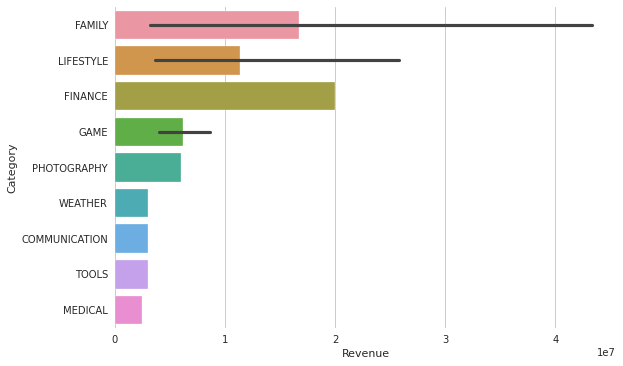

In [ ]:
sns.barplot(x=df2['Revenue'], y=df2['Category'])
#plt.xticks(rotation=90)
plt.show()

## Get the Top Applications according to the Reviews 

In [ ]:
df3 = playstore_df[['App','Reviews']].sort_values(by=['Reviews'], ascending = False).head(20)
df3

,App,Reviews
3943,Facebook,78128208
3904,WhatsApp Messenger,69109672
3909,Instagram,66509917
4104,Messenger – Text and Video Chat for Free,56642847
3986,Clash of Clans,44881447
4005,Clean Master- Space Cleaner & Antivirus,42916526
3896,Subway Surfers,27711703
3928,YouTube,25623548
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999
3987,Clash Royale,23125280


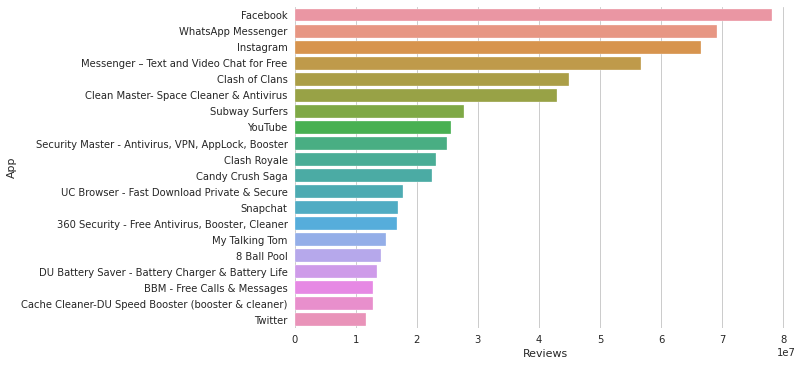

In [ ]:
sns.barplot(x=df3['Reviews'], y=df3['App'])
##plt.xticks(rotation=90)
plt.show()

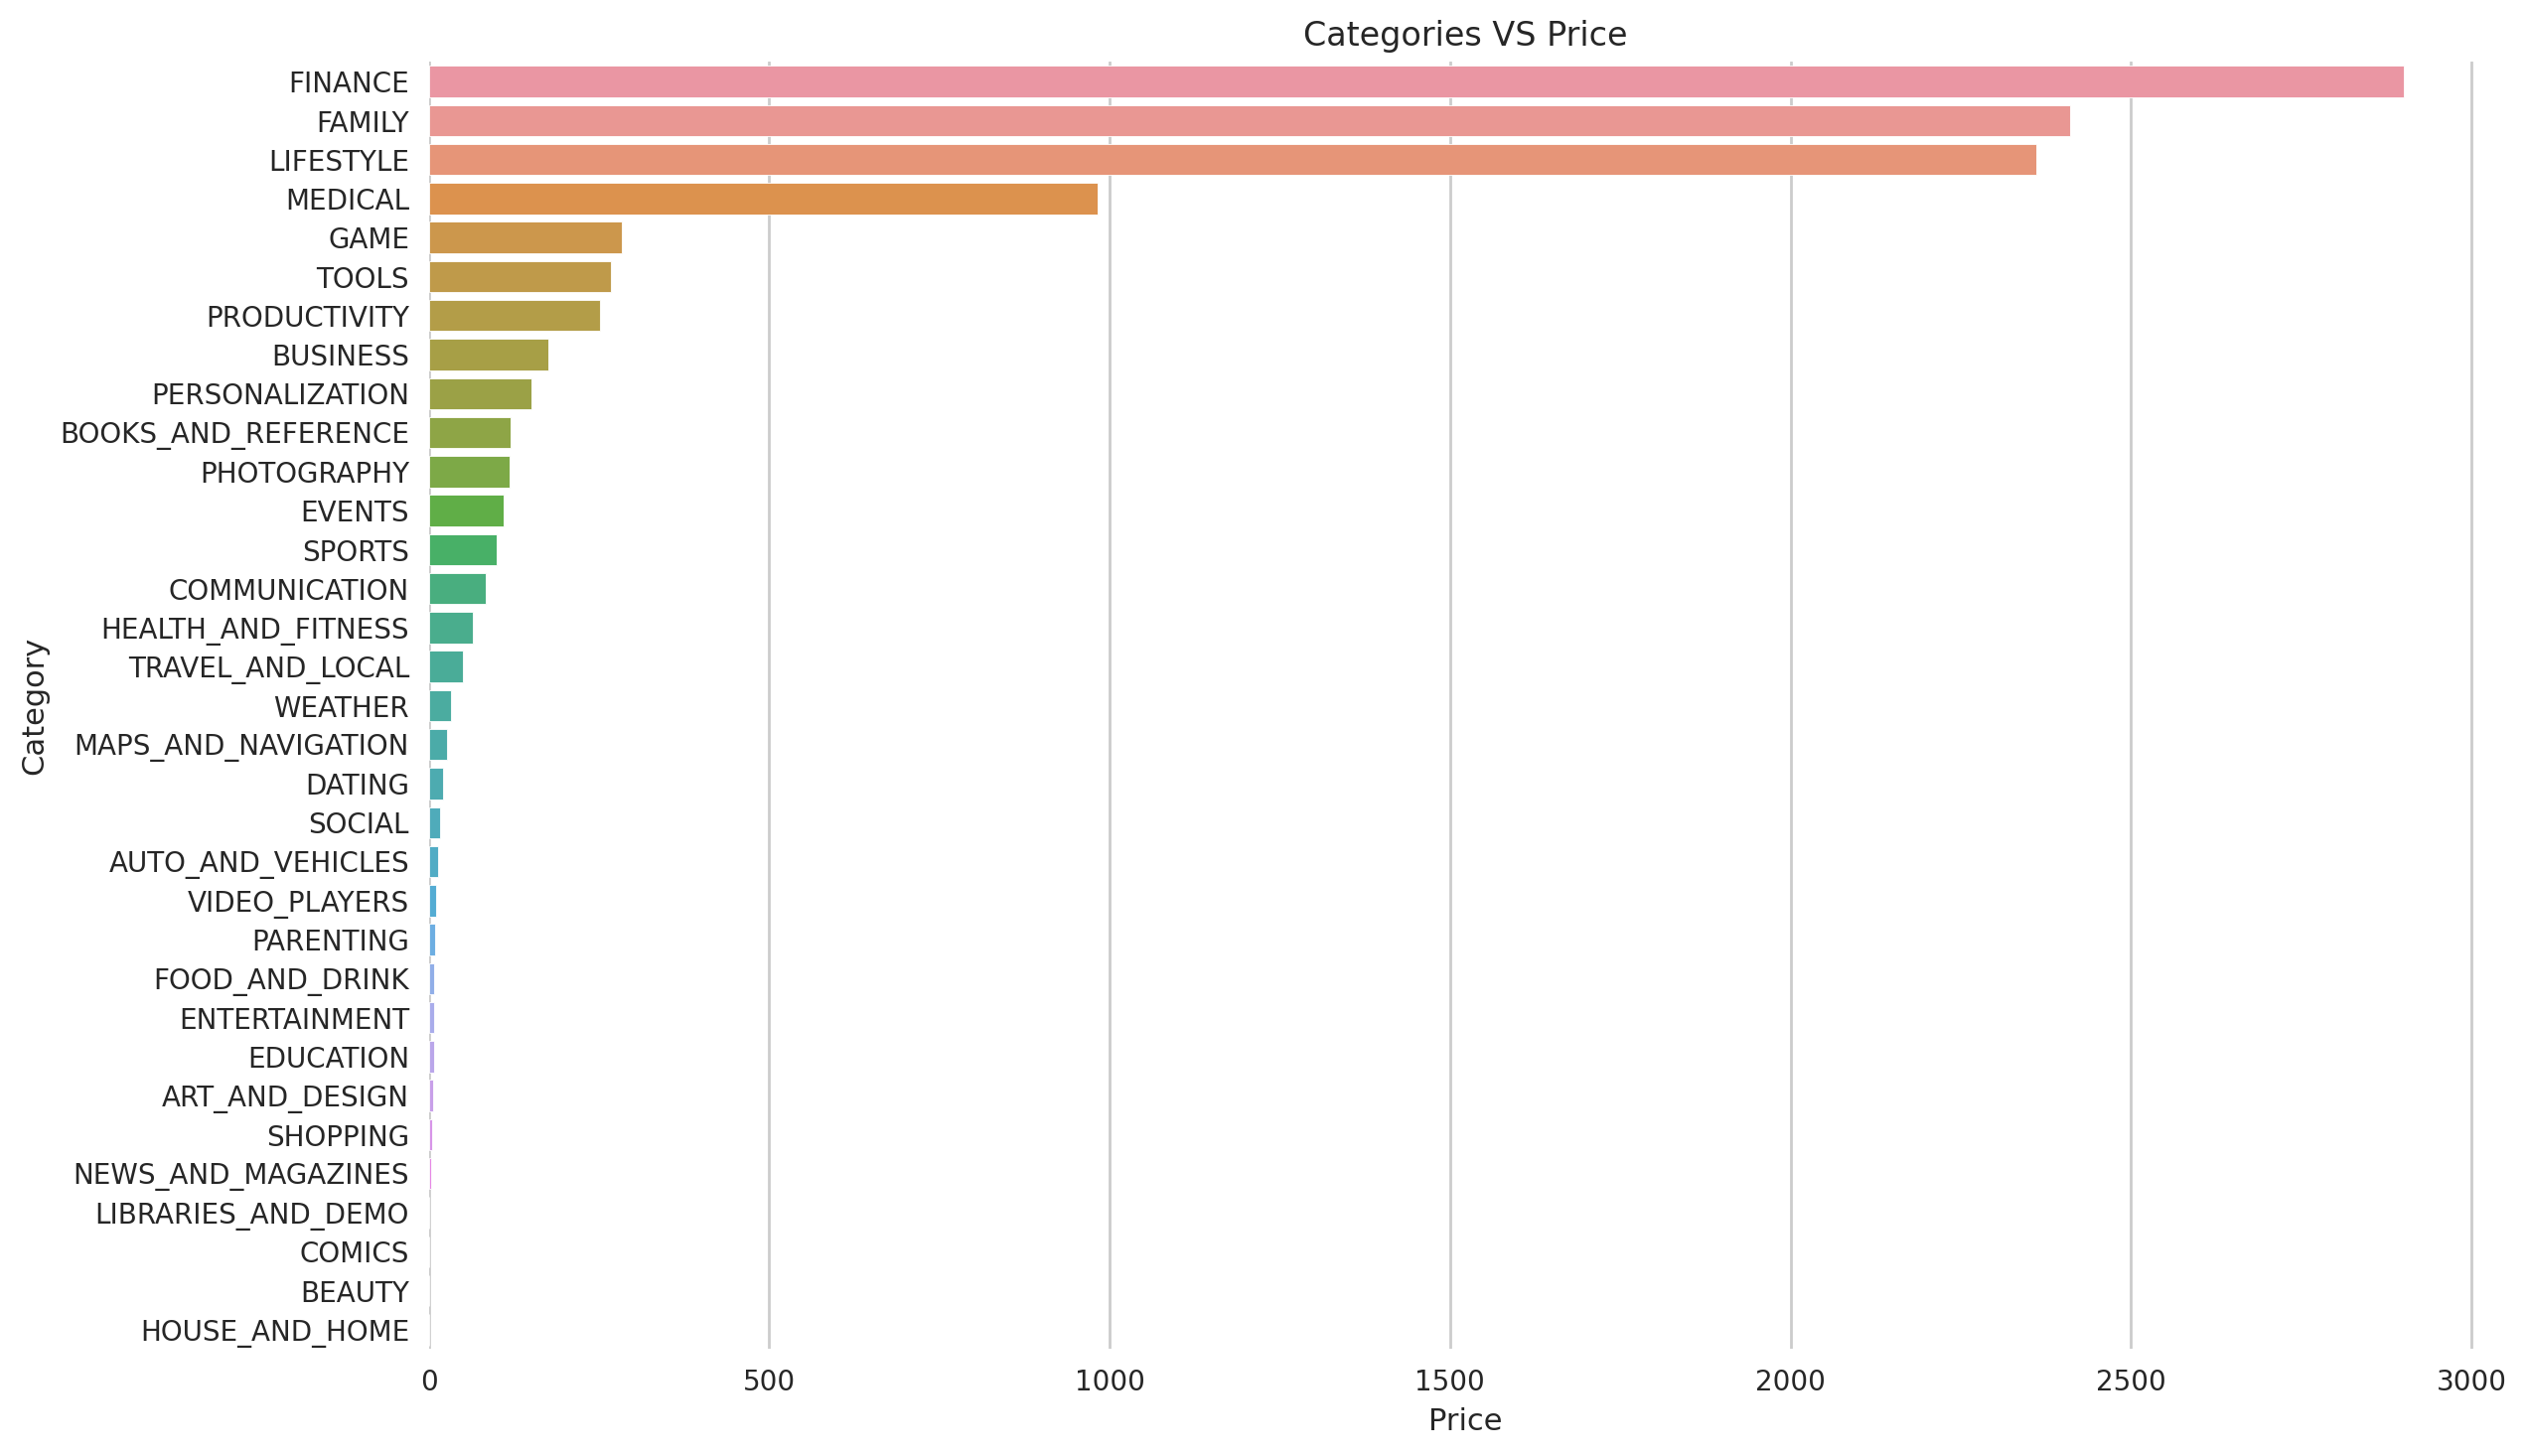

In [ ]:
plt.figure(figsize = (12,8), dpi = 200)
df4 = playstore_df.groupby(['Category']).sum()['Price']
df4 = df4.sort_values(ascending = False)
sns.barplot(y=df4.index,x=df4)
##plt.xticks(rotation=90)
plt.title('Categories VS Price')
plt.show()

In [ ]:
pd.DataFrame(df.head(10))

,Installs
Category,
COMMUNICATION,1.103928e+10
GAME,1.089792e+10
FAMILY,8.870643e+09
TOOLS,8.102772e+09
PRODUCTIVITY,5.788091e+09
SOCIAL,5.487868e+09
PHOTOGRAPHY,4.658148e+09
VIDEO_PLAYERS,3.917003e+09
TRAVEL_AND_LOCAL,2.894887e+09


Text(0.5, 1.0, 'Category VS Number Of Apps')

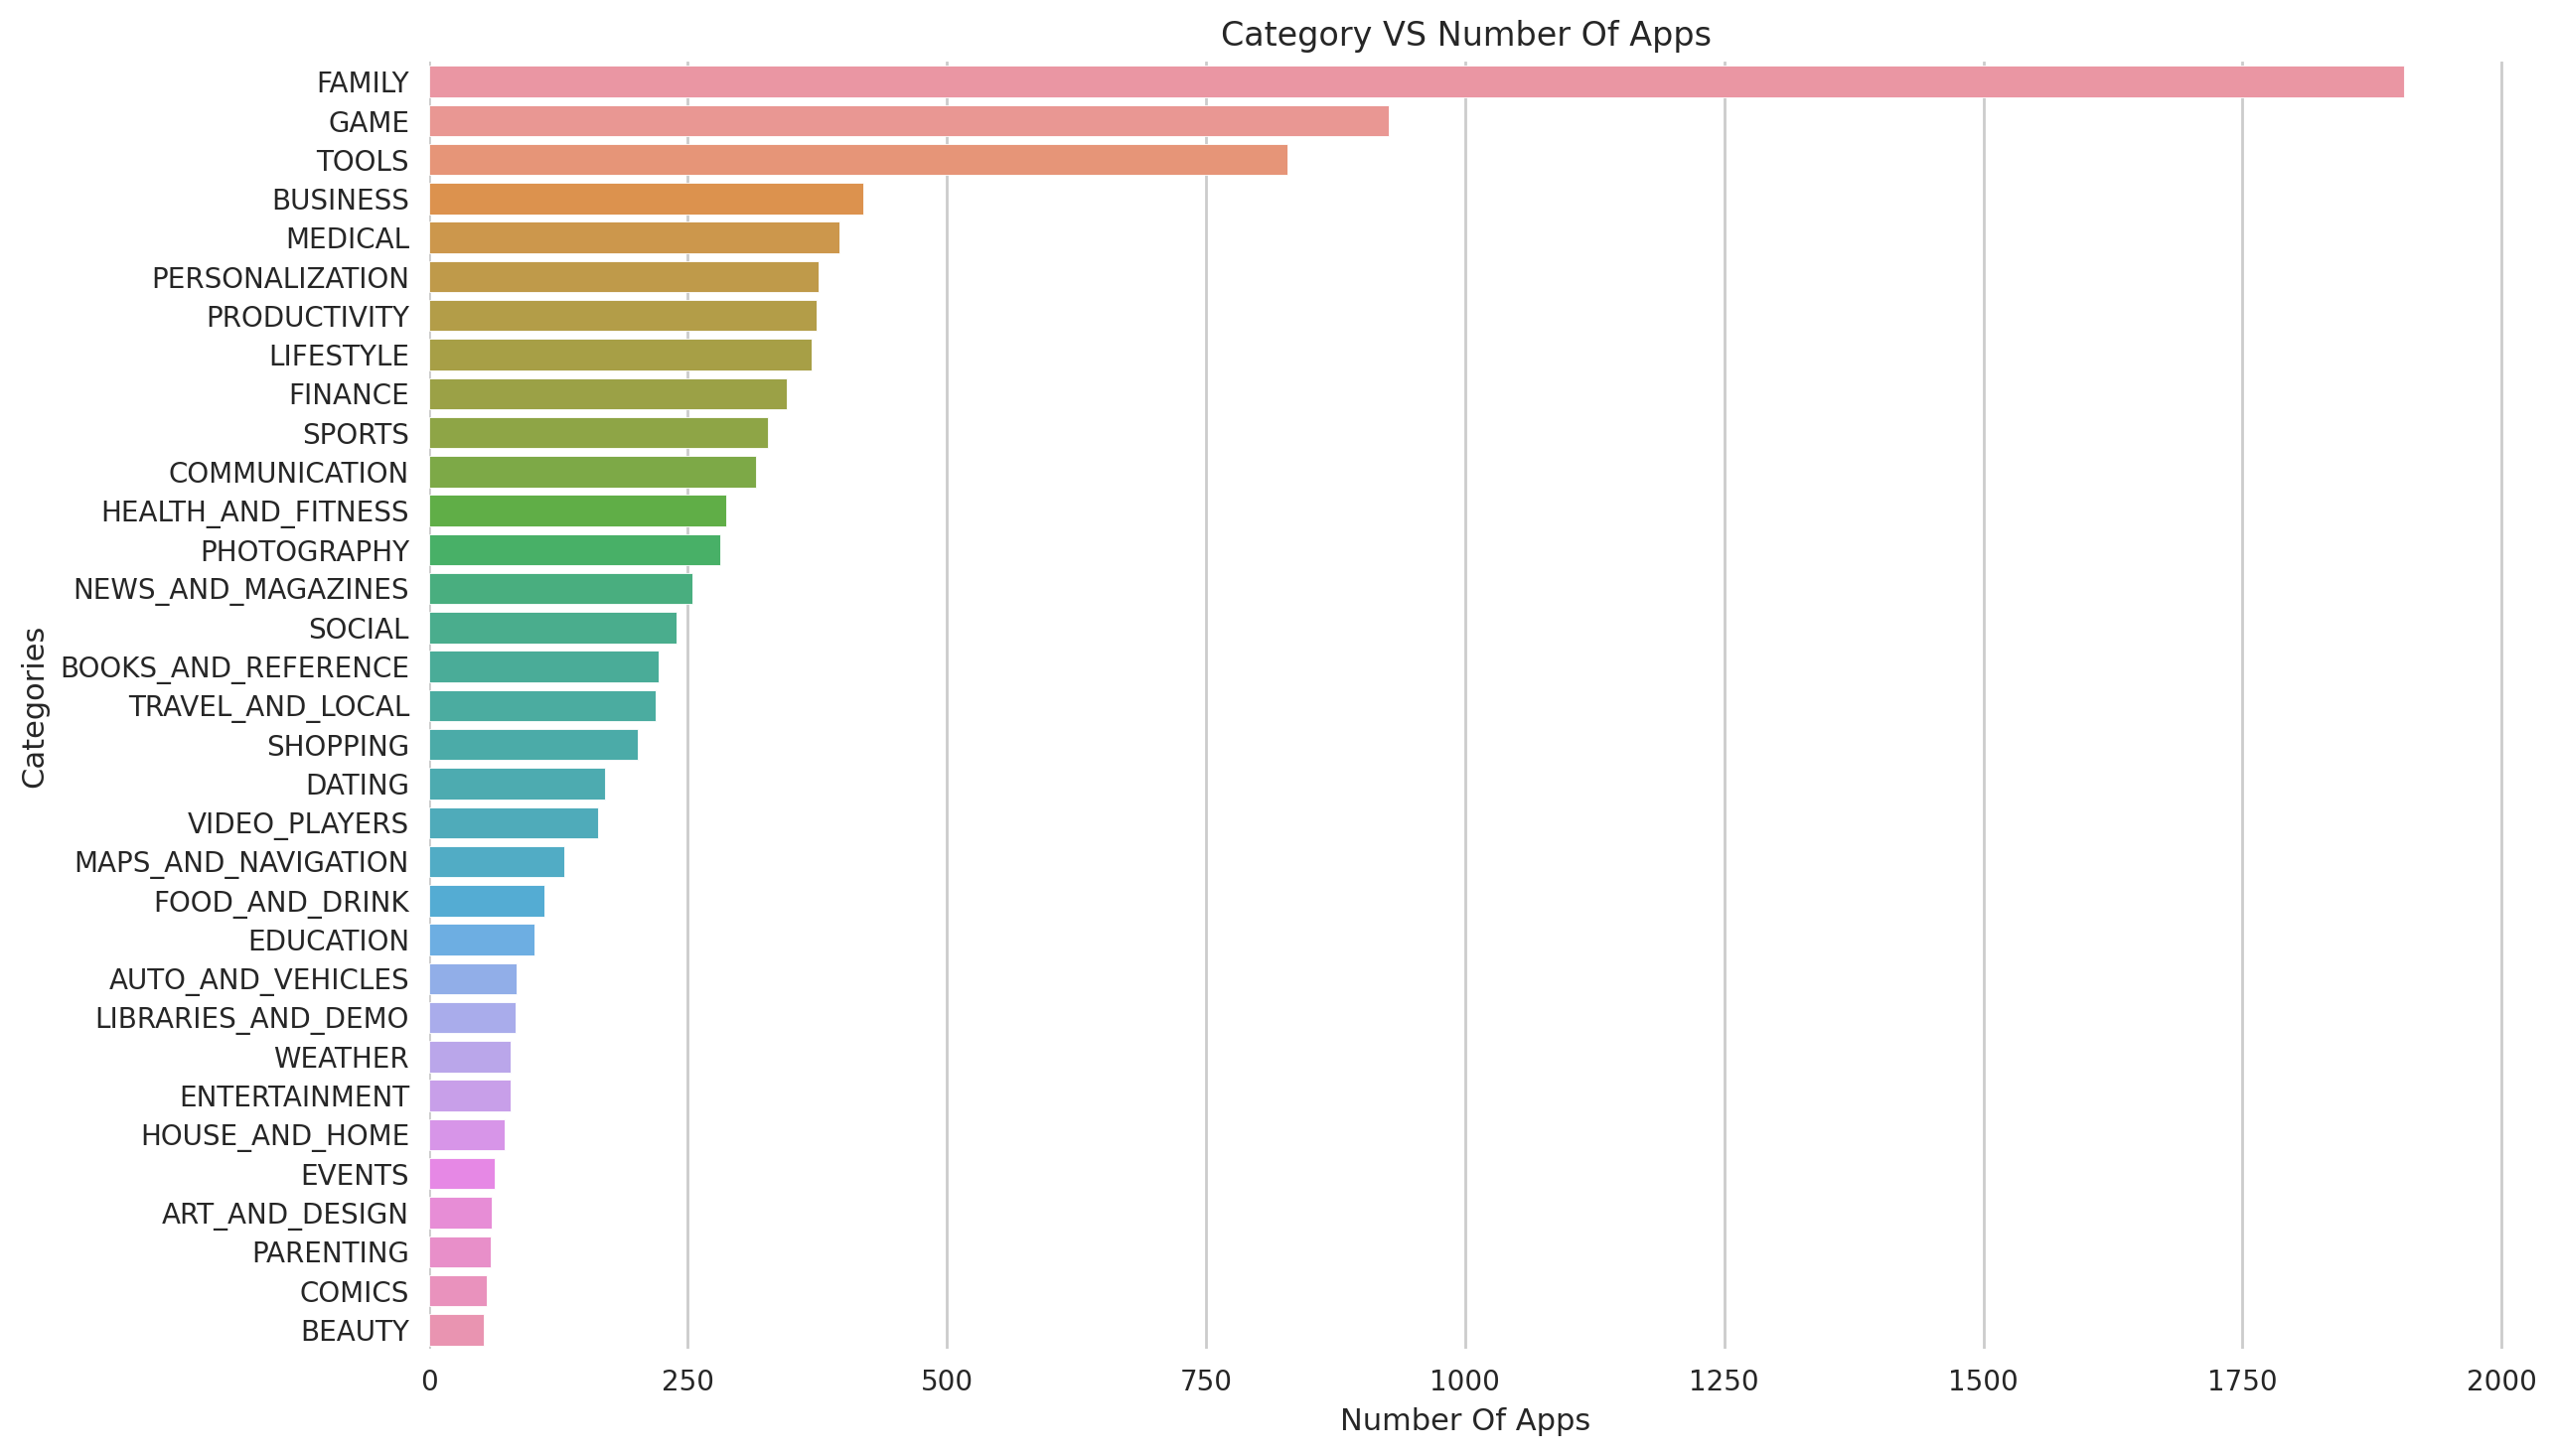

In [ ]:
plt.figure(figsize = (12,8), dpi = 200)
df6 = playstore_df['Category'].value_counts()
ax = sns.barplot(y=df6.index,x=df6)
ax.set_xlabel("Number Of Apps")
ax.set_ylabel("Categories")
plt.title('Category VS Number Of Apps')

# <b> EDA on User Reviews

In [ ]:
user_reviews_df= pd.read_csv('/content/drive/MyDrive/Datasets/User_Reviews.csv')

In [ ]:
user_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
user_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
user_reviews_df.head(20)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000


In [ ]:
(user_reviews_df.isnull().sum()/user_reviews_df.isnull().count()) * 100

App                        0.000000
Translated_Review         41.788631
Sentiment                 41.780854
Sentiment_Polarity        41.780854
Sentiment_Subjectivity    41.780854
dtype: float64

In [ ]:
user_reviews = user_reviews_df.copy()

### Checking the Sentiment of the users based on their experience 

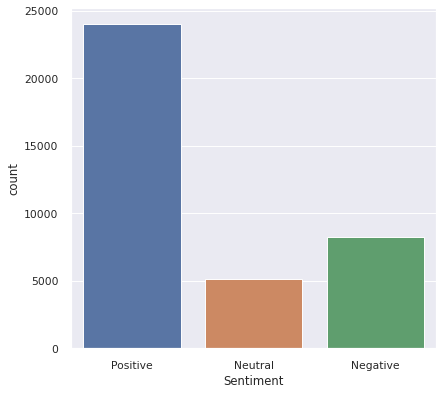

In [ ]:
plt.figure(figsize=(6,6),dpi = 70)
sns.set(style="darkgrid")
sns.countplot(user_reviews['Sentiment'])
plt.show()

In [ ]:
s = user_reviews['Sentiment']

In [ ]:
#Counting the percentage of sentiments 
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent99 = s.value_counts(normalize=True).mul(100).round(1)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
Positive,23998,0.641109,64.1%
Negative,8271,0.220961,22.1%
Neutral,5163,0.137930,13.8%


In [ ]:
print(percent99)

Positive    64.1
Negative    22.1
Neutral     13.8
Name: Sentiment, dtype: float64


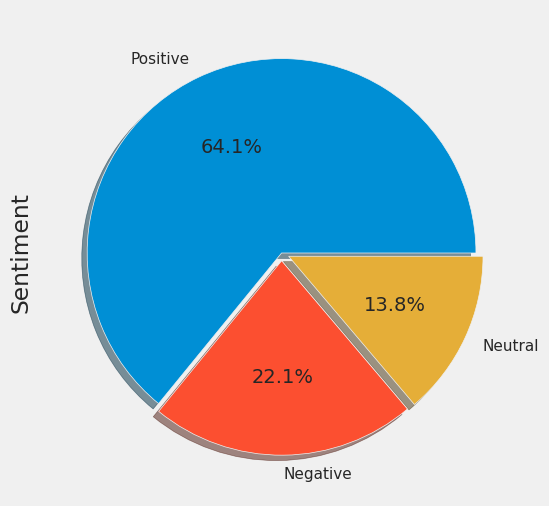

In [ ]:
#Plotting a pie chart to analyse the sentiment and percentage
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,6),dpi = 100)
percent99.plot.pie(explode=[0,0.04,0.04],autopct="%1.1f%%",shadow=True)
plt.show()

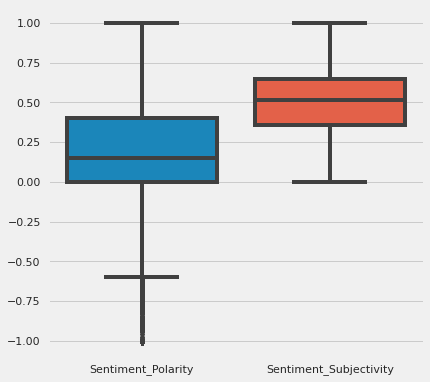

In [ ]:
# Checking the outiers using Box Plot
plt.figure(figsize = (6,6))
sns.boxplot(data = user_reviews)
plt.show()

<b>From the above boxplot we can see that there are no outliers is Sentiment_Subjectivity and Sentiment_Polarity

In [ ]:
(user_reviews.isnull().sum()/user_reviews.isnull().count()) * 100

App                        0.000000
Translated_Review         41.788631
Sentiment                 41.780854
Sentiment_Polarity        41.780854
Sentiment_Subjectivity    41.780854
dtype: float64

In [ ]:
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


### Correlation analysis among variables

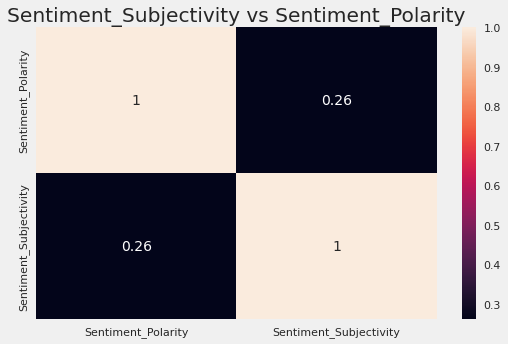

In [ ]:
plt.figure(figsize=(8,5))
corrMatrix = user_reviews.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title("Sentiment_Subjectivity vs Sentiment_Polarity")
plt.show()

- Taking correlation matrix to analyse correlation.
- We can see that there is no correlation between Sentiment_Subjectivity and Sentiment_Polarity

## Merging the two dataframes to do combined data analysis 

In [ ]:
# Using merge to merge two columns 
merged_df = playstore_df.merge(user_reviews, on="App")
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,0.0,It's...a coloring book ap. And I like adult co...,Positive,2.166667e-01,0.573810
1,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,0.0,wanted access pictures. I denied let app. Don'...,Neutral,0.000000e+00,0.000000
2,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,0.0,Way many ads... im paying 8$USD pictures color...,Positive,3.000000e-01,0.600000
3,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,0.0,"good bad color outside lines. like real, tradi...",Positive,2.775558e-17,0.579167
4,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,0.0,I really enjoying application. My complaint sm...,Negative,-3.472222e-02,0.581944


In [ ]:
category_sentiment = merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')
category_sentiment = category_sentiment.pivot('Category', 'Sentiment', 'Sentiment Count').fillna(0).reset_index().set_index('Category')

In [ ]:
category_sentiment.head()

Sentiment,Negative,Neutral,Positive
Category,,,
ART_AND_DESIGN,47,58,233
AUTO_AND_VEHICLES,17,36,236
BEAUTY,65,88,185
BOOKS_AND_REFERENCE,95,108,448
BUSINESS,167,258,654


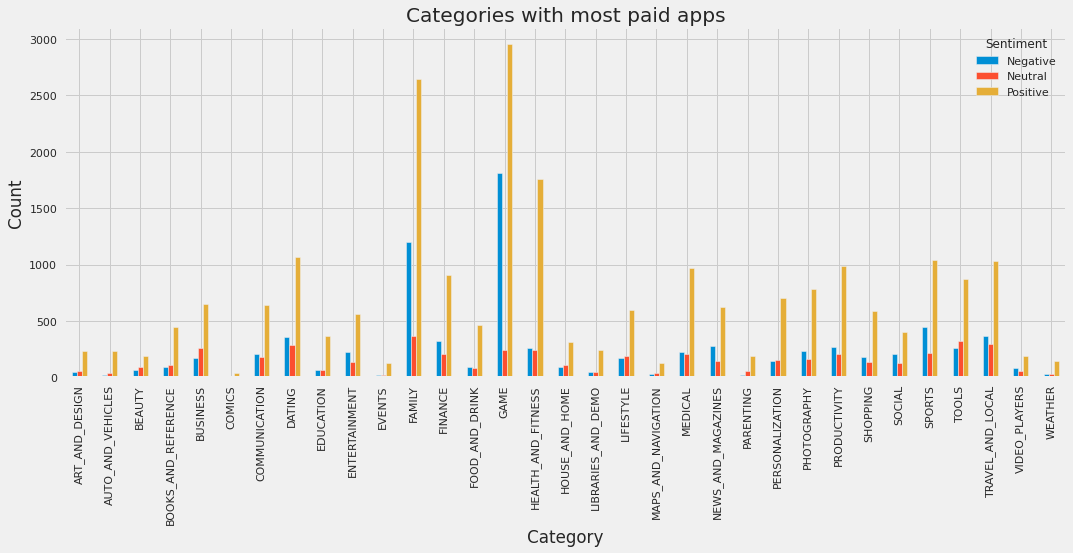

In [ ]:
plt.style.use('fivethirtyeight')
category_sentiment.plot(kind='bar', figsize=(16,6) )
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Categories with most paid apps")
plt.show()